# House Sales in King County, USA


This project will explore and analyze housing prices in the King County, WA area given the dataset provided below. Using a number of different methodologies and packages, I will attempt to predict housing prices using different available features such as square footage, floors, bathrooms, bedrooms, etc.

The below libraries will need to be installed and imported to leveraged throughout this analysis. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing Dataset


Dataset for this analysis can be found [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv').

In [11]:
file_name="kc_house_data_NaN.csv"

Use the Pandas method <b>read_csv()</b> to read in the dataset saved locally.


In [16]:
df = pd.read_csv(file_name)

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [10]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We'll need to display the datatypes of each column to understand what we can work with and if any datatype needs to be changed.


In [12]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


We use the method describe to obtain a statistical summary of the dataframe.


In [11]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Wrangling


We can drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code> as they are not needed, then use the method <code>describe()</code> to obtain an updated statistical summary of the data. 


In [13]:
df.drop("id", axis="columns", inplace=True)
df.drop("Unnamed: 0", axis="columns", inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [17]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>.


In [18]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. 


In [19]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [20]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Exploratory Data Analysis and Visualization
#### In this section, I'll run through some analysis and visualization to better understand what factors may be strong contributors to overall price of a house.

We'll use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a dataframe.


In [17]:
df_floors = df[['floors']].value_counts()
df_floors.to_frame()

,0
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8




Next, we'll use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers, where '0' is without waterfront and '1' indicates waterfront view. It appears waterfront views have a wider distribution of price, but fewer outliers.


Text(0.5, 1.0, 'Distribution of Pricing: With or Without Waterfront Housing')

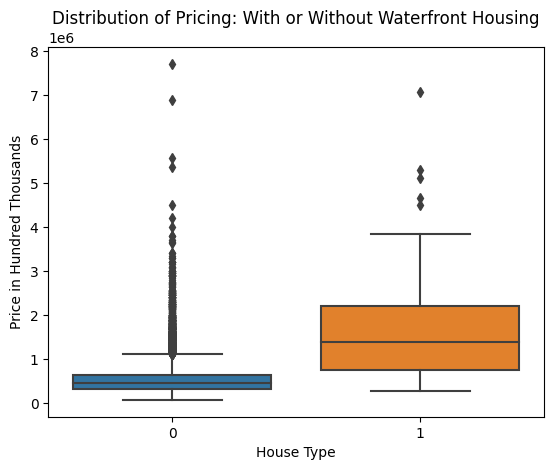

In [21]:
sns.boxplot(data=df, x="waterfront", y="price")
plt.xlabel('House Type')
plt.ylabel('Price in Hundred Thousands')
plt.title('Distribution of Pricing: With or Without Waterfront Housing')

The <code>regplot</code> function in the seaborn library can determine if the feature <code>sqft_above</code> is negatively or positively correlated with price. As expected, square footage above ground (not including the basement) has a postive correlation with price.


Text(0.5, 1.0, 'Correlation between SqFt Above and Housing Price')

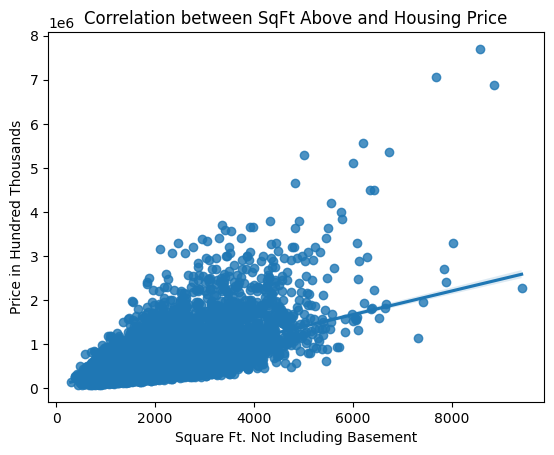

In [28]:
sns.regplot(data=df, x='sqft_above', y='price')
plt.xlabel('Square Ft. Not Including Basement')
plt.ylabel('Price in Hundred Thousands')
plt.title('Correlation between SqFt Above and Housing Price')

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [29]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
Unnamed: 0       0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Model Development
#### In this section we'll begin to develop different models to find accurate predictors of price.

Using the scikit-learn package, we can fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2. It appears longitude is not a good indicator of price and this model is not a good fit.


In [22]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

We'll do the same as above using <code>'sqft_living'</code> to predict <code>'price'</code> using the feature  then calculate the R^2. In this case, <code>'sqft_living'</code> may be a good indicator of price.


In [31]:
x = df[['sqft_living']]
y = df[['price']]
lm1 = LinearRegression()
lm1.fit(x,y)
lm1.score(x, y)

0.4928532179037931

This time, we are going to create a list called features and fit a linear regression model to understand if these features are good indicators of price.

In [23]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]  
x = df[features]
y = df[['price']]
lm2 = LinearRegression()
lm2.fit(x, y)

LinearRegression()

So far we have our best R^2 score yet - it looks like using this list of features creates a well fitted model.


In [24]:
lm2.score(x, y)

0.6576537175949295

We are going to move to using a polynomial regression model to predict price, leveraging the sklearn 'Pipeline' class. This allows data to flow through each step sequentially, making preprocessing and modeling tasks easier. First we'll create a list of tuples. 
the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor:
###### StandardScaler() will standardize each feature fed into the model
<code>StandardScaler()</code>
###### PolynomialFeatures will generate polynomial features defined in the 'features' list above to a degree of 2
<code>PolynomialFeatures(include_bias=False)</code>
###### Now that data has been preprocessed, it will be fed through the LinearRegression object
<code>LinearRegression()</code>


In [25]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Next, we'll use our pipeline input 'Input' to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.


In [26]:
pipeline = Pipeline(Input)
pipeline.fit(x, y)
price_predict = pipeline.predict(x)
r2 = pipeline.score(x,y)
print("The predicted prices are: ", price_predict)
print("The R-squared of the model is: ", r2)

The predicted prices are:  [[349682. ]
 [559151.5]
 [449514. ]
 ...
 [417290. ]
 [459724. ]
 [417236. ]]
The R-squared of the model is:  0.7513411741799744


# Model Evaluation and Refinement


Importing the necessary modules:


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [32]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Now that we've split our data into train and test, we can fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [33]:
from sklearn.linear_model import Ridge

In [34]:
ridge_model = Ridge(alpha=.1)
ridge_model.fit(x_train,y_train)
r2_score = ridge_model.score(x_test, y_test)
print("R Squred of Ridge Model is: ", r2_score)

R Squred of Ridge Model is:  0.6478759163939114


To take this further, we'll perform a second order polynomial transform on both the training data and testing data. In addition, we'll create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.

In [35]:
poly_transform = PolynomialFeatures(degree=2)
x_train_poly = poly_transform.fit_transform(x_train)
x_test_poly = poly_transform.transform(x_test)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train_poly, y_train)

r2 = ridge_model.score(x_train_poly, y_train)
print("R2 is equal to: ", r2)

R2 is equal to:  0.741816743868313
